In [30]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Load possible targets trajectory
q_1 = np.load("Data/target_1.npy")  
q_2 = np.load("Data/target_2.npy")  
q_1 = q_1.T
q_2 = q_2.T

T = q_1.shape[0]


In [32]:
# Define optimization variables
x = cp.Variable((T, 4))
u = cp.Variable((T-1, 2))  


In [33]:
# Values of rho, p_1 and p_2
rho = 0.1
p1_list = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
p2_list = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0]

# Define A, B, E matrices
A = np.array([
    [1, 0, 0.1, 0],
    [0, 1, 0, 0.1], 
    [0, 0, 0.8, 0],
    [0, 0, 0, 0.8]
    ])

B = np.array([
    [0, 0],
    [0, 0],
    [0.1, 0],
    [0, 0.1]
    ])

E = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
    ])

# Define x_initial vector
x_initial = np.array([0.5, 0, 1, -1])


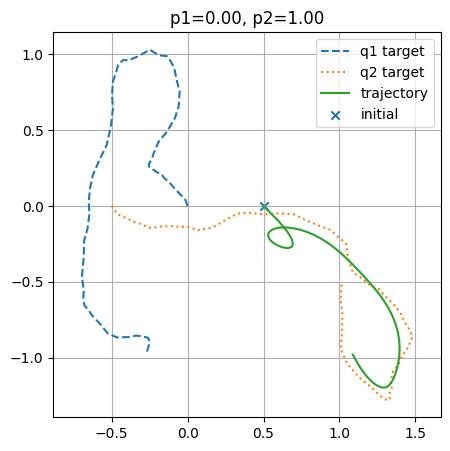

rho=0.1 | TE=94.5823 | CE=69.6061


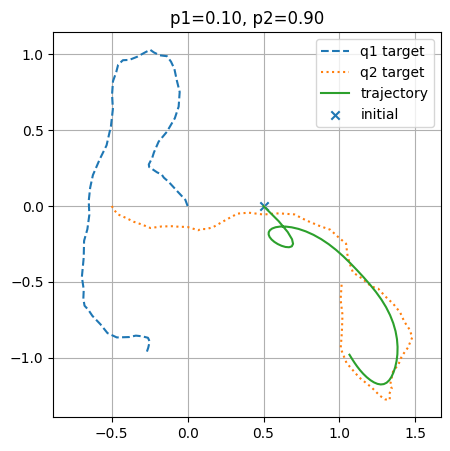

rho=0.1 | TE=94.0107 | CE=67.4638


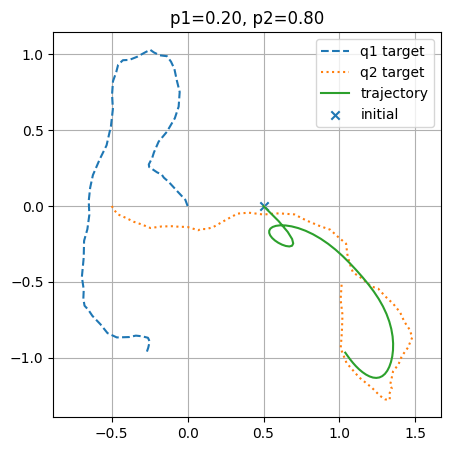

rho=0.1 | TE=93.0033 | CE=63.7356


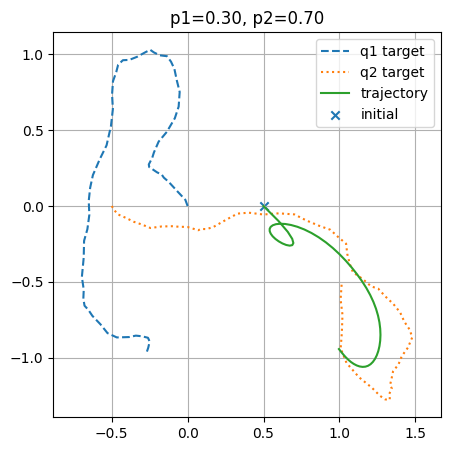

rho=0.1 | TE=90.5226 | CE=56.3715


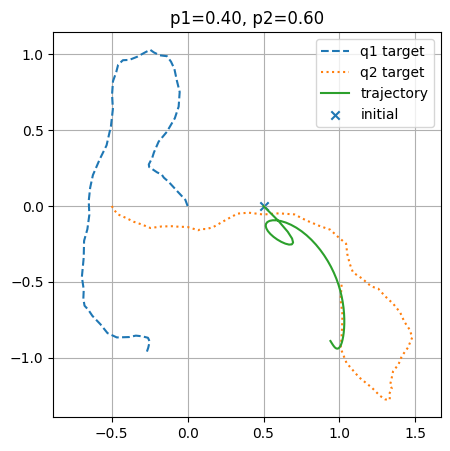

rho=0.1 | TE=83.1762 | CE=43.7686


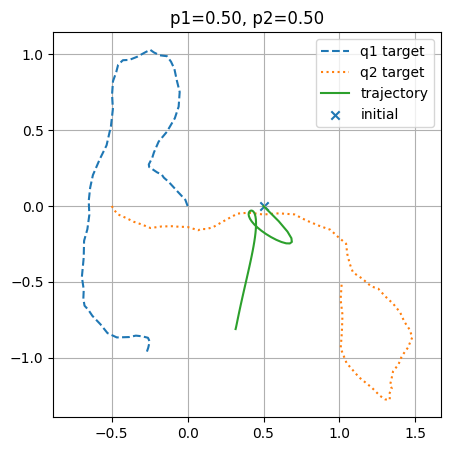

rho=0.1 | TE=59.7384 | CE=38.1819


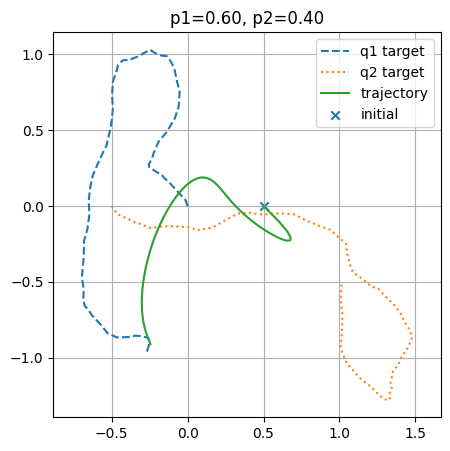

rho=0.1 | TE=35.9448 | CE=63.2388


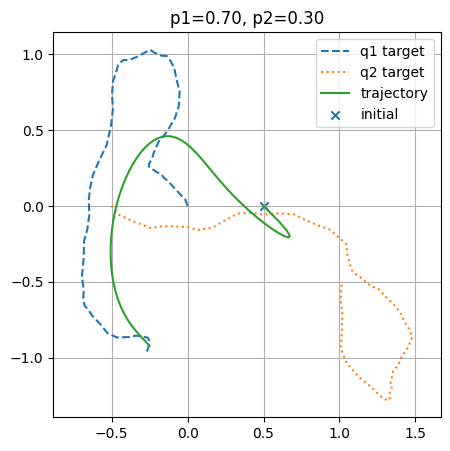

rho=0.1 | TE=24.7581 | CE=99.8221


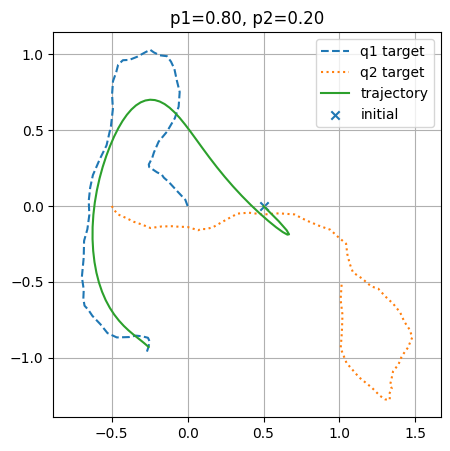

rho=0.1 | TE=17.3903 | CE=137.8938


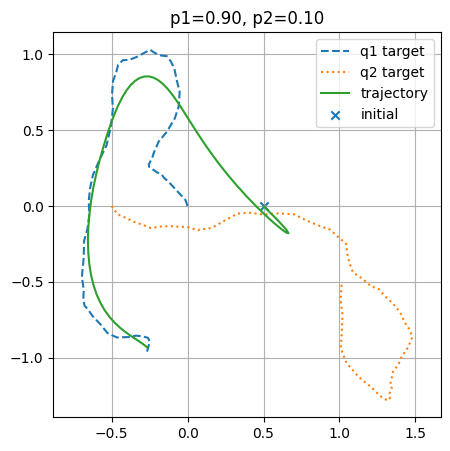

rho=0.1 | TE=13.7198 | CE=164.0594


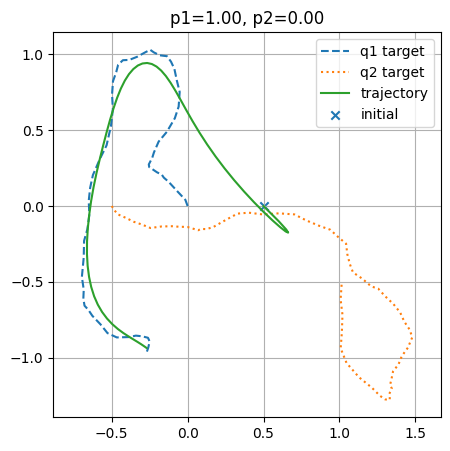

rho=0.1 | TE=12.0041 | CE=179.3756


In [34]:
TE_1_values = []
TE_2_values = []
CE_values = []
results = []

for idx, (p1, p2) in enumerate(zip(p1_list, p2_list)):
    # Variables
    x = cp.Variable((T, 4))  # State variable
    u = cp.Variable((T-1, 2))  # Control variable

    # Constraints
    constraints = [x[0, :] == x_initial]
    for t in range(T-1):
        constraints += [x[t+1, :] == A @ x[t, :] + B @ u[t, :]]

    # Objective
    TE_1 = cp.sum([cp.norm(E @ x[t, :].T - q_1[t, :].T, 2) for t in range(T)])
    TE_2 = cp.sum([cp.norm(E @ x[t, :].T - q_2[t, :].T, 2) for t in range(T)])
    CE = cp.norm(u, "fro")**2
    objective = cp.Minimize(p1 * TE_1 + p2 * TE_2 + rho * CE)

    # Solve problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Extract results
    x_val = x.value
    u_val = u.value

    TE_1_values.append(TE_1.value)
    TE_2_values.append(TE_2.value)
    CE_values.append(CE.value)


    # Plot trajectory vs target
    traj = (E @ x_val.T).T
    plt.figure(figsize=(5,5))
    plt.plot(q_1[:,0], q_1[:,1], linestyle='--', label='q1 target')
    plt.plot(q_2[:,0], q_2[:,1], linestyle=':', label='q2 target')
    plt.plot(traj[:,0], traj[:,1], label='trajectory')
    plt.scatter([x_initial[0]],[x_initial[1]], marker='x', label='initial')
    plt.title(f"p1={p1:.2f}, p2={p2:.2f}")
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

    print(f"rho={rho} | TE={TE_1.value:.4f} | CE={CE.value:.4f}")
